Peining Che, Gregory Pataky; CSE627, Miami University

   # I. Preliminary data mining with Orange

[Orange](https://orange.biolab.si/) is a Python library and GUI that allows easy data visualization and machine learning. We have used the Orange Canvas GUI tool to play with the data and will provide screenshots and explanations of our setup. 

We are using [Anaconda](https://www.anaconda.com/what-is-anaconda/) for Python package and environment management set up with the basic packages and a development version of [Orange 3](https://github.com/biolab/orange3/tree/nn-widget) that was built from source from a branch which included a neural networks model widget.

## A. Finding Best Classifier

We loaded the provided [training data](https://www.kaggle.com/c/titanic/data) into Orange Canvas "File" widget. The "File" widget allow us to see the data columns and types and select which features are targets.

We then set up a "Test & Score" widget with a range of classifiers. This allowed us to quickly compare models on the data set without having to spend too much time configuring each classifier manually.

### Important
Make sure to set the seed on the models so changes in features/parameters reflect actual changes in prediction ability and not different random choices.

![Fig 1: Orange Canvas Screenshot showing all classifiers](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img1.png)
![Fig 2: Orange Canvas "Test & Score" Results](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img2.png)

For this dataset:
- Classification Accuracy is the actual number of survivors over all survivors predicted.
- Precision can be thought of as how accurate predictions are: the number of correct survivor predictions over the total classified as survivors (including correct and false positives).
- Recall can be thought of as how complete predictions are: the number of correct survivor predictions over the total amount of actual survivors (including correct and false negatives).
- F1 score is a measure of accuracy by combining precision and recall.

From these results, we see that a "Random Forest" model has the best Classification Accuracy (CA) and Precision along with second-best Recall leading to the best F1 score. 

For more information on what these metrics mean visit: [Test & Score - Orange Visual Programming 3 Documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/evaluation/testandscore.html).

We now only focus on best five models as ranked here: "Random Forest," "Neurel Network," and "Stochastic Gradient Descent." As we create features, we will continue to analyze the effectiveness of each model.

![Fig 3: Orange Canvas with reduced classifiers](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img3.png)

## B. Visualizing Data

By connecting a "Scatter Plot" widget to the "File" widget, we can visualize 2D slices of the data. Orange makes data visualization much easier than manually creating charts or graphs in R or Python.

![Fig 34: Data Visualization in Orange](screenshots/img34.png)

We can easily see how the selected axes affect survivability (where blue circles mean death and red x's mean survived). Orange also features a tool called "Find Informative Projections" that will find meaningful 2D slices of the data to better get a sense of the data as a whole.

![Fig 35: Find Informative Projections](screenshots/img35.png)

## C. Data Cleaning

First, we need to finish setting up a data mining workflow in Orange to help us more easily manipulate the data.

Workflows are used in a variety of data analytics libraries and applications and Orange Canvas provides a simple introduction to them.

We are going to add Orange widgets to allow for preprocessing of data and manual feature creation. We run the results of our "Feature Construction" through a "Rank" widget to be able to easily visualize which features are the most beneficial to prediction (more on that later).

We also added a "Data Table" widget that allows us to see all of the data and our new features side-by-side. This is helpful to make sure features are being created as intended. The "Data Table" widget also gives helpful information about the data's target variable(s) and how many missing values exist.

We are then going to connect those widgets in a chain to the "Test & Score" widget to see how our changes impact the model accuracies in "real time" (or as long as it takes to re-score all models).

![Fig 4: Orange Canvas with Workflow](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img4.png)

For preprocessing, we need to look at the data and see if there is anything that needs fixing. We created a script that would give us some insights into missing data values and put it in a "Python Script" module named "Find missing values."

![Fig 5: Orange Canvas Showing Python Script widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img5.png)
![Fig 6: Python Script Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img6.png)

From what we can see in the output above, there is data missing in the "Age" column and the "Embarked" column. Our options to fill in the missing data are to remove the rows, replace the missing values with random values, or replace the missing values with averages or most frequence. 

Because there are around 180 rows of missing data and we were only given 891 rows, deleting the rows would drop roughly 20% of the training data. Adding random values may increase noise more than we would like, but the same can be said for putting in averages. We chose, however, to fill in the missing values with the average of the column. This makes sense in the continuous "Age" column, but makes less sense for the "Embarked" column where there are only three possibilities. However, "Embarked" only has two missing values so these replacements hsould be little more than slight noise.

In the "Preprocess" widget, we set up a filter for missing values to be replaced by their column average or most frequent value.

![Fig 7: Preprocess widget configuration](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img7.png)

This change seemed to average out the posisble models slightly, with "Random Forest" slightly losing F1 accuracy and the other two gaining slightly.

![Fig 8: Orange "Test & Score" After Cleaning Data](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img8.png)

## D. Feature Creation and Test

We are already able to make some pretty good predictions based on what the "Test & Score" widget is telling us, but we may be able to improve it by creating some features from the provided metadata.

The metadata fields provided are "Name," "Ticket," and "Cabin." We can most likely pull some useful information out of these. In addition, since we are using the non-linear "Random Forest" model, it may be beneficial to manually pool some liner combinations of features together.

### i. New Features

From the "Name" metadata, we will create two new features: a categorical "Title" feature representing the person's title (Mr., Master., Miss, Mrs.) and a continuous "NameLength" feature representing the length of the "Name" metadata field. 

The "Title" field makes sense because it allows us to distinguish age and sex more effectively. It seems logical that children and women may be let first onto life boats, and these can be distinguished with titles like "Master" (used for boys at the time), "Miss," and "Mrs."

We wrote a script to find all of the titles used in the dataset.

![Fig 9: Orange Canvas Title List Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img9.png)
![Fig 10: Script to List all Titles](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img10.png)

The list of titles found was: 'Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'. 
Some quick Google searches yield a breakdown of:
- Mr (Men)
  - Mr, Rev, Dr, Major, Col, Capt
- Mrs (Women)
  - Mrs, Dr, Mme
- Miss (Girls)
  - Miss, Ms, Mlle
- Master (Boys)
  - Master
- Royal (Male)
  - Don, Sir, Jonkheer
- Royal (Female)
  - Lady, Countess
  
Due to the nature of this feature, we will use another "Python Script" widget to take in the input data and create a new column for a person's title. In order to merge this in with our other features created through the "Feture Creation" widget, we must also create a "Merge Data" widget.

![Fig 11: Orange Canvas New Python Script Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img11.png)
![Fig 12: Command to create new Orange Data Table for Title](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img12.png)

It is important to note that the "Python Script" widget has special named variables that can be used for input and output, and that these must obey special type rules. Read more about these here: [Orange Python Script Widget](https://docs.orange.biolab.si/3/visual-programming/widgets/data/pythonscript.html). We had some issues with scripts saving in Orange's project file, so be sure to save your scripts manually to be able to easily reset them if anything goes wrong.

The "NameLen" field is something we wanted to specifically look at and see if it gave any useful information. Because we are just playing with data and models, and can easily disable a feature, it does not make much difference to our eventual solution to try things out.

It is simple enough logic to be included in the "Feature Constructor."
![Fig 13: Feture Construction Screenshot](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img13.png)

We are given two features "SibSp," which is the number of siblings and spouses on the ship, and "Parch," which stands for the number of parents and children aboard the ship. These two features seem closely related and it seems possible that the total number of family may matter more than the type of family. 

Because of Orange, we can quickly prototype this feature and test it out to see how it affects our models.

To test our hypothesis, we created a simple feature in the "Feature Construction" widget that would add "SibSp" and "Parch" together to create "FamilySize."
![Fig 14: ](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img15.png)

The "Test & Score" results with "SibSp" and "Parch":
![Fig 15: ](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img16.png)

The "Test & Score" results with "FamilySize":
![Fig 16: ](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img17.png)

From these results, it seems that our models fare better with the "FamilySize" feature rather than the other two so we will keep it.

Finally, we created a "TicketNum" feature that extracts the numeric portion of "Ticket" and store sit in a continuous column. We again used a "Python Script" widget to do the data extraction due to the multistep process to parse and clean the "Ticket" data. Because of this, we had to include another "Merge" widget to get all of the data together in  on output. Because our script fails to parse every single ticket value, we also added another "Preprocess" widget that replaces missing values with the column average.

![Fig 18: Orange Canvas with Add TicketNum Feature](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img18.png)

The script we used:
![Fig 19: Add TicketNum Feature Script](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img19.png)

The final results from feature creation are shown here:
![Fig 20: REsults of Feature Creation](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img20.png)

#### Notes

We also looked at extracting a feature from the provided "Cabin" data but we found the original data was too sparse to really make the feature meaningful. It will appear in the "Rank" widget, but is just deselected to not affect our models.

### ii. Feature Selection

We can then use the "Rank" widget we set up previously to figure out which features we should include for the final model. Every feature is selected except "SibSp" and "Parch" due to the combined "FamilySize" feature we created.

![Fig 21: "Rank" widget before selection](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img21.png)

Scoring Methods:
- Information Gain is the expected amount of information that can be gathered from this feature in relation to the target variable(s).
- Gain Ratio reduces possible information gain bias towards multiple classes. 
- Chi2 measures the dependence between the feature and the target.
- ReliefF is the ability of a feature to distuinguish target classes on similar data rows.
- FCBF stands for "Fast Correlation Based Filter" and identifies redundancy in pairs of features.
More information can be found here: [Rank - Orange Visual Programming 3 documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/data/rank.html).

The power of Orange here is that we can simply select and deselect columns and see how the model output changes. We used the "Rank" metrics and some testing to figure out we should keep all features except "SibSp," "Parch," "CabinLevel," and "PassengerId".

![Fig 21B: "Rank" Widget after selection](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img21b.png)

### Important
Make sure to set the seed on the models so changes in features/parameters reflect actual changes in prediction ability and not different random seeds.

"Test & Score" then displays:
![Fig 22: Final Predictions for Selected Features](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img22.png)

## E. Model Parameters

Now that we have finalized the features to use, we can optmize the model parameters to try to squeeze out extra performance.

For the "Random Forest" mode, we have choices for the number of trees, the number of attributes at each split, a fixed seed for the random generator, limited tree depth, and smallest trees to split. More information for each can be found at [Random Forest - Orange Visual Programming 3 Documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/model/randomforest.html).

For the "Neural Network" model, we have the choice of neurons per layer, activation function, solver function, alpha, and max iterations. Since this is an in-progress feature, there is not documentation for it yet. We also found that playing with these parameters did not seem to increase performance that much.

The "Stochastic Gradient Descent" model has many parameters, but the "Random Forest" performance has pulled so far ahead that we did not spend much time trying to optimize it. Documentation can be found here: [Stochastic Gradient Descent - Orange VIsual Programming 3 Documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/model/stochasticgradient.html).

We were able to slightly improve the "Random Forest" model:
![Fig 23: Final Model Score](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img23.png)

## F. Boosting the Model

Orange includes a model called "AdaBoost" that can take another model as a base and allows for the optimization of hidden parameters. Documentation is provided at [AdaBoost - Orange Visual Programming 3 documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/model/adaboost.html).

The "AdaBoost" model can be configured into our flow as shown:
![Fig 24: "AdaBoost" Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img24.png)

With some parameter testing, we were able to boost F1 accuracy to 0.788. Precision improved to above "Neurel Net" levels while not losing too much Recall.
![Fig 25: AdaBoost Test & Score](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img25.png)

## G. Confusion Matrices

Orange also has built-in support for Confusion Matrices and can generate them automatically from the results of the "Test & Score" widget. Documentation is here: [Confusion Matrix - Orange Visual Programming 3 documentation](https://docs.orange.biolab.si/3/visual-programming/widgets/evaluation/confusionmatrix.html).

We can connect the widget as so:
![Fig 28: Connecting "Confusion Matrix" Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img28.png)

We can then visualize the results of "Test & Rank" more easily and see the difference between Precision and Recall.
![Fig 29: "Confusion Matrix" Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img29.png)
Our models tend to be more conservative and make few errors when classifying a person as survived, but tend to predict many false negatives. This is most likely because the dataset has more examples of people who died than survived so more death indications can be learned.

## H. Predicting outcomes for the test set

We can also predict answers to the provided test.csv directly through Orange. Although it seems like our AdaBoosted Random Forest is classifying correctly, we need to see how it generalizes to some unknown test data.

We first connect the imput file to every model. This will allow us to use models learned on the training data for making predictions on test data. 

![Fig 29B: Connecting Training Data to Models](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img29b.png)

To recreate the feature construction for test data, we have to add a "File" widget referring to the test.csv from Kaggle. We have to create copies of each "Python Script" widget and the "Feature Construction" widget from the training data. It is helpful to save the "Python Script" code to file and import those into copies. The data then has to be merged together like with training using "Merge" widgets. We cannot use the "Rank" widget to select features this time because the test data has no inherent target. Instead, we use a "Select Columns" widget to do the same thing.

![Fig 30: Connecting "Predictions" Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img30.png)

These predictions can be saved to a file using the "Save Data" widget. Before we do that, we can make is easier on ourselves to submit to Kaggle by having only the two columns Kaggle grades saved. To do that, we need to add back in the "PassengerId" column and rename the AdaBoost prediction to "Survived." 

The workflow to do this is shown below:
![Fig 31: Connecting "Save Data" Widget](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img31.png)

## I. Prediction Results

We had to remove two meta colums from the output csv file and were then able to submit the results to Kaggle. Kaggle scored our submission with a 76.076% accuracy, which is not bad, but off from our "Test & Score" module prediction of a 84.7% classification accuracy or even a 78.8% accuracy from the F1 score.

This underperformance could very well be due to overfitting of the training data to get high accuracies on train/validation sets but that do not give a good prediction for more general data. This is most likely due to using 20 folds, which leaves each to have a validation set of roughly 30 passengers and a RandomForest model that uses 14 trees to classify only 9 features.

However, beacuse we're using Orange, we can easily just readjust all of these parameters and try again.

We found the following parameters yield a 77.1% F1 accuracy in Orange, the highest we could find using 5 folds of the data, which was chosen because 5 is the minimum fold size and because 891/5 is roughly half the size of the test.csv data and should thus be a better predictor for accuracy.

![Fig 33: Readjusted Features](https://raw.githubusercontent.com/zjijz/cse627-kaggle-titanic/master/screenshots/img33.png)

Kaggle scored the output of the AdaBoost model with a 77.990%.

# II. Pandas and SK-Learn Solution

We will now implement the model, boost, features, and parameters we found through Orange in normal Python libraries to afford us greater control over data manipulation.

## A. Imports

In [1]:
# Python 3 Lib
import functools
import itertools
import re
from random import seed

# 3rd Party
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt

# Sklearn
import sklearn.model_selection as sk_models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

## B. Data Cleaning and Feature Extraction

All of these function will take one Pandas DataFrame as input and return one Pandas DataFrame as output so they can be composted together. 

The goal at the end of this section will be to build a pipeline similar to Orange and run train and test through it once at the end.

Since we have more power to play with the data using Pandas and underlying Sklern models, we can make more complex data cleaning methods and try to tune the models a little more than in Orange.

### i. Training Data

We import the train.csv data into a Pandas DataFrame.

In [2]:
train = pd.read_csv('titanic_data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are some missing values for 'Age' and 'Embarked' that we will have to fill-in to use Sklearn, but we gathered as much from Orange. As we discovered in Orange, the 'Cabin' variable is most likely unsalvedgable unless we try to assign similar cabin decks to family members, but that is both assuming and out of the scope we set for ourselves.

Since 'Embarked' is missing only 1 value, we will replace it with the most frequent.

### ii. Test Data

We import the test.csv data into a Pandas DataFrame.

In [3]:
test = pd.read_csv('titanic_data/test.csv')
passengerIds = test['PassengerId']
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have issues with the 'Age' and 'Cabin' columns here too, with the addition of one missing value in 'Fare'.

There is a dilemma with 'Age' now. 20% of 'Age' is missing in both the training and test data. We can try to fill in the column with the average age overall, but that would probably bias our results and lose some helpful information as it is likely that age played a factor in deciding who got onto life boats first. Instead, we will impute the average for the corresponding 'Title' for the row.

### iii. Cleaning Functions

These functions will impute missing values and convert categorical data to numerical values.

In [4]:
def fill_in_missing_age_values(df):
    """
    Converts missing age values to the mean age of title holder.
    
    :param df: Pandas DataFrame to clean.
    :returns: New Pandas DataFrame with missing vlaues replaced.
    """
    
    ret = df.copy()
    for i, row in df.iterrows():
        if pd.isnull(row['Age']):
            ret.at[i, 'Age'] = ret.groupby('Title', as_index=False)['Age'].mean().iloc[row['Title']]['Age']
    return ret

In [5]:
def fill_in_missing_values(df):
    """
    Converts missing values to the mean or mode of the column.
    
    :param df: Pandas DataFrame to clean.
    :returns: New Pandas DataFrame with missing valued of df replaced by mean (for numeric values) 
                or mode for the column (for any other type of value)
    """
    
    ret = df.copy()
    for column in df:
        df_c = df[column]
        ret[column] = ret[column].fillna(ret[column].mean() if np.issubdtype(df_c.dtype, np.number) 
                                         else ret[column].value_counts().index[0])
    return ret

In [6]:
def convert_values_to_numbers(df):
    """
    Converts non-numeric values to numbers.
    Be careful is possible values are missing in train that might be present 
    in test since this might not map the values the same.
    
    :param df: Pandas DataFrame to clean.
    :returns: New Pandas DataFrame with converted values.
    """
    
    ret = df.copy()
    for column in df:
        df_c = df[column]
        if not np.issubdtype(df_c.dtype, np.number):
            vals = sorted(df_c.unique())
            ret[column] = df_c.map({key: i for i, key in enumerate(vals)})
    return ret

### iv. Feature Creation

We are going to recreate the features we made in Orange using the Pandas library and Python. These are all mostly self-explanatory and follow similar logic to their Orange implementations.

#### Title Feature
One important difference to not here is that instead of mapping titles to "Royal (M)" and "Royal (F)," we instead choose to map those titles to "Mr" and "Mrs" respectively since we later found that the royal titles do not appear in the test data and were causing our model to overfit the training data.

In [7]:
title_names = ['Mr', 'Mrs', 'Miss', 'Master', 'Royal (M)', 'Royal (F)']
def add_title_feature(df):
    """
    Creates Title feature based on Name column.
    
    :param df: Pandas DataFrame to edit.
    :returns: New Pandas DataFrame with new feature.
    """
    
    def get_title(name, sex):
        comma_ind = name.find(',')
        dot_ind = name.find('.', comma_ind + 2)
        title = name[comma_ind + 1:dot_ind].split(' ')[-1]
        if title in ['Mr', 'Rev', 'Major', 'Col', 'Capt']:
            title = 0
        elif title in ['Mrs', 'Mme']:
            title = 1
        elif title in ['Miss', 'Ms', 'Mlle']:
            title = 2
        elif title in ['Master']:
            title = 3
        elif title in ['Don', 'Sir', 'Jonkheer']:
            title = 0 # Royal (M) doesn't show up in test.csv, so we're setting this to just be Mr
        elif title in ['Lady', 'Countess']:
            title = 1 # Royal (F) doesn't show up in test.csv, so we're setting this to just be Mrs
        else:
            if sex == 'female':
                title = 1
            else:
                title = 0
        return title
    ret = df.copy()
    ret['Title'] = [get_title(name, sex) for name, sex in zip(df['Name'], df['Sex'])]
    return ret

#### NameLen Feature

In [8]:
def add_name_len_feature(df):
    """
    Creates NameLen feature based on Name column.
    
    :param df: Pandas DataFrame to edit.
    :returns: New Pandas DataFrame with new feature.
    """
    
    ret = df.copy()
    ret['NameLen'] = [len(name) for name in df['Name']]
    ret['NameLen'] = ret['NameLen'].astype(int)
    return ret

#### TicketNum Feature

In [9]:
def add_ticket_num_feature(df):
    """
    Creates TicketNum feature based on Ticket column.
    
    :param df: Pandas DataFrame to edit.
    :returns: New Pandas DataFrame with new feature.
    """
    
    def get_ticket_num(ticket):
        num = ticket.split(' ')[-1]
        digits_only = re.compile(r'\D+')
        num = digits_only.sub('', num)
        return int(num) if len(num) > 0 else None
    ret = df.copy()
    ret['TicketNum'] = [get_ticket_num(ticket) for ticket in df['Ticket']]
    return ret

#### FamilySize Feature

In [10]:
def add_family_size_feature(df):
    """
    Creates FamilySize feature based on SibSp and Parch columns.
    
    :param df: Pandas DataFrame to edit.
    :returns: New Pandas DataFrame with new feature.
    """
    
    ret = df.copy()
    ret['FamilySize'] = [sibsp + parch for sibsp, parch in zip(df['SibSp'], df['Parch'])]
    return ret

### v. Feature Selection
Now we need a function to "trim the fat" off the data table to prepare it for fitting to our model. We follow the same logic we used with the "Rank" widget from Orange along with removing all meta-attributes.

In [11]:
def trim_data_table(df):
    """
    Removes unnecessary columns from the DataFrame.
    
    :param df: Pandas DataFrame to edit.
    :returns: New Pandas DataFrame with removed features.
    """
    
    return df.drop(['PassengerId', 'Parch', 'SibSp', 'Name', 'Cabin', 'Ticket'], axis=1)

### vi. Composing Functions

This is where the beauty of defining all previous functions as we did shows. We can create a 'pipeline' function that is the result of all functions being applied together. It takes a Pandas DataFrame and returns a new Pandas DataFrame that has all changes applied.

#### It is important to note the functions are applies in "reverse" order since the later functions will be applied first.

In [12]:
def compose(*functions):
    """
    :param functions: All functions to be composted.
    :returns: One function that is the resuly of applying all functions together.
    """
    
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

pipeline = compose(convert_values_to_numbers,
                   fill_in_missing_values,
                   fill_in_missing_age_values,
                   trim_data_table,
                   add_family_size_feature,
                   add_ticket_num_feature,
                   add_name_len_feature,
                   add_title_feature)

We can now run the cleaning and feature extraction functions and inspect the resulting tabels to see that all missing values are gone and all column types are numeric (necessary for Sklearn).

In [13]:
train = pipeline(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
NameLen       891 non-null int64
TicketNum     891 non-null float64
FamilySize    891 non-null int64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


In [14]:
test = pipeline(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
NameLen       418 non-null int64
TicketNum     418 non-null int64
FamilySize    418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


### vii. Checking Data Values

While writing the function to fill age in with the average of it's 'Title,' we noticed that some values of 'Title' were not used in the test.csv file, so we might as edit the function to only use the values available in test to not train a redundant part of the model or risk overfitting our training data (the function would already be edited by here). We thought to check the other categorical values to ensure we were not overfitting elsewhere.

This function should let us check if any values appear in train.csv but not in test.csv.

In [15]:
for column in train:
    if column not in ['Ticket', 'PassengerId', 'Name', 'Survived'] and str(train[column].dtype) != 'float64':
        print(column, '\n\tTrain.csv:', train[column].unique(), '\n\tTest.csv:', test[column].unique(), '\n')

Pclass 
	Train.csv: [3 1 2] 
	Test.csv: [3 2 1] 

Sex 
	Train.csv: [1 0] 
	Test.csv: [1 0] 

Embarked 
	Train.csv: [2 0 1] 
	Test.csv: [1 2 0] 

Title 
	Train.csv: [0 1 2 3] 
	Test.csv: [0 1 2 3] 

NameLen 
	Train.csv: [23 51 22 44 24 16 30 49 35 31 27 36 32 20 28 55 21 29 57 19 46 34 56 40 17
 25 45 26 50 13 15 33 18 52 47 38 37 41 14 42 39 82 48 54 43 67 65 53 61 12] 
	Test.csv: [16 32 25 44 26 20 28 41 23 45 55 17 37 22 36 31 47 29 40 49 24 48 19 18 15
 13 27 21 46 33 51 30 35 52 59 54 38 53 42 62 39 34 43 58 14 63] 

FamilySize 
	Train.csv: [ 1  0  4  2  6  5  3  7 10] 
	Test.csv: [ 0  1  2  4  3  5  7  6 10] 



It looks like 'Title' was the only column that would really have need to be checked since the only other categorical columns are 'Pclass,' 'Sex,' and 'Embarked,' which are guaranteed by Kaggle to have the same domain values.

### viii. Data Visualization

It would be helpful to see how these features affect survivability. We will do this by showing histograms of feature values and the percentage that died and survived from those groupings.

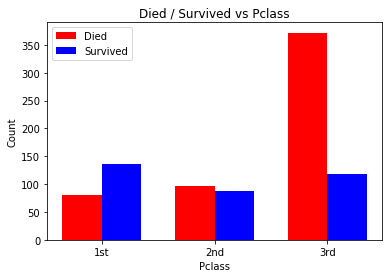

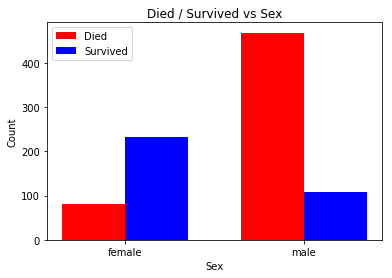

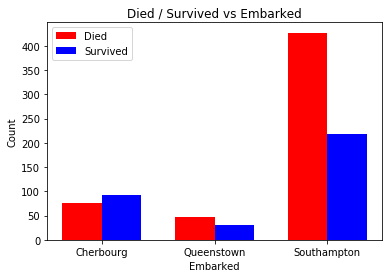

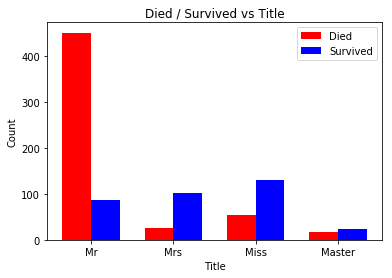

In [16]:
mask_survived = train['Survived'] == 1
mask_died = train['Survived'] == 0

bar_width = 0.35

labels = {'Pclass': ['1st', '2nd', '3rd'], 
          'Sex': ['female', 'male'],                              # sort order would put 'f' before 'm'
          'Embarked': ['Cherbourg', 'Queenstown', 'Southampton'], # sort order would put 'C' before 'Q' before 'S'
          'Title':title_names}

for column in train:
    if column in ['Pclass', 'Sex', 'Embarked', 'Title']:
        values = sorted(train[column].unique())
        counts_died = []
        counts_survived = []
        for value in values:
            counts_died.append(len(train[mask_died & (train[column] == value)]))
            counts_survived.append(len(train[mask_survived & (train[column] == value)]))
        
        xs = np.arange(len(values))
        bar1 = plt.bar(xs, counts_died, bar_width, align='center', color='r')
        bar2 = plt.bar(xs + bar_width, counts_survived, bar_width, align='center', color='b')
        plt.xticks(xs + bar_width / 2, labels[column])
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title('Died / Survived vs ' + column)
        plt.legend((bar1, bar2), ('Died', 'Survived'))
        plt.show()

From these graphs, we can see that all of our categorical features have some significance since different categories have different have different die/survive ratios. 

There is a much better chance at surviving if you were in the 1st class, about equal for the second class, and waty more likely to die in the 3rd class.

The gender split is also interesting as being a woman led to a chance of surviving (~70% survive rate) while being male almost confirmed death (~80% death rate).

What was unexpected was seeing that leaving at Southampton had both the most people and highest death rate, but it most likely correlates with lower class passengers boarding.

The created 'Title' feature is interesting since the four values have very different ratios, with 'Mrs' and 'Miss' having high surivive chances (~80% and ~75%) and 'Master' having about equal.

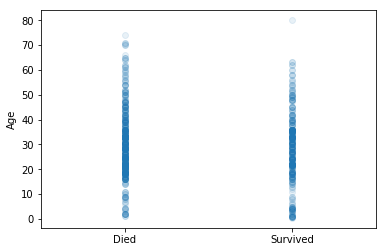

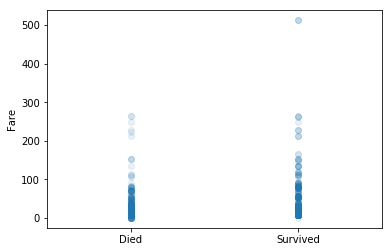

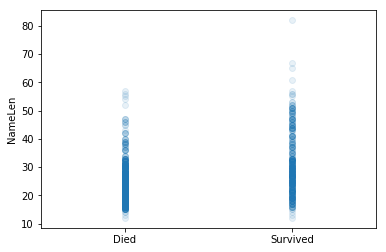

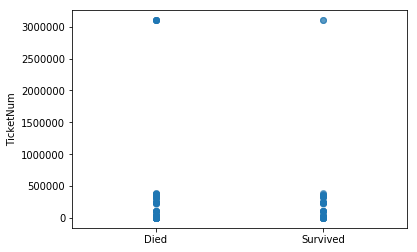

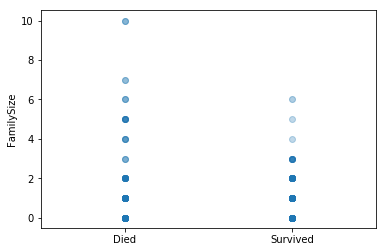

In [17]:
for column in train:
    if column in ['NameLen', 'FamilySize', 'TicketNum', 'Age', 'Fare']:
        plt.scatter(train['Survived'], train[column], alpha=0.1)
        plt.xticks((0, 1), ('Died', 'Survived'))
        plt.ylabel(column)
        plt.xlim((-0.5, 1.5))
        plt.show()

What is important from these graphs is to look at the distributions and see if there are any significant differences that may allow the models to better predict results. 

We see that instantly that 'TicketNum' seems to have the very similar distributions for both 'Died' and 'Survived,' so we probably should remove it from consideration. This is an extra insight that was overlooked from our Orange exploration because we relied too heavily on the "Rank" widget.

The rest of the distributions seem to vary enough to keep them in for the final model.

In [18]:
train = train.drop('TicketNum', axis=1)
test = test.drop('TicketNum', axis=1)

### ix. Splitting train into train + test and test into make_predictions

We are going to make some tables and rename some others to split the train.csv into three sets:
- *train*: Part of train.csv we will use to build our models.
- *test*: Part of train.csv we will use to predict how well our models will do.
- *make_predictions*: The whole of test.csv.

In [19]:
# Used to 'fix' randomness of models while we change parameters
seed(64)

make_predictions = test
train, test = sk_models.train_test_split(train, test_size=0.25)

train_survived = train['Survived']
train = train.drop('Survived', axis=1)

test_survived = test['Survived']
test = test.drop('Survived', axis=1)

## B. Model Creation

We use the values for fetures we found through Orange for these models. However, while looking through the documentation, we also saw that the RandomForestClassifier can take a 'class_weight' field an dused values for the class weights equal to the real proportion of people who died and survivied on the Titanic. AdaBoost also uses values we found through Orange.

We train each of them on the train set, which is 75% of the total train data. The holdout 25% will be used to esitmate our accuracy once we submit to Kaggle.

In [20]:
rf = RandomForestClassifier(n_estimators=5, max_features=6, max_depth=11, min_samples_split=4,
                            class_weight={0: 0.68, 1: 0.32})
rf.fit(train, train_survived)

boost = AdaBoostClassifier(base_estimator=rf, n_estimators=3, learning_rate=0.05)
boost.fit(train, train_survived);

## C. Model Accuracy and Error

We present some functions to take a model and create the associated classification report, confustion matrix, and predicted accuracy based on test data.

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Written by Dr. Femiani.
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
target_names = ['Died', 'Survived']
def print_performance_metrics(title, model):
    print('**', title, '**')
    predictions = model.predict(test)
    print(classification_report(predictions, test_survived, target_names=target_names))
    plot_confusion_matrix(confusion_matrix(predictions, test_survived), classes=target_names)
    plt.show()
    print('Test Accuracy:', model.score(test, test_survived), '\n')

** Random Forest **
             precision    recall  f1-score   support

       Died       0.93      0.79      0.86       153
   Survived       0.66      0.87      0.75        70

avg / total       0.84      0.82      0.82       223



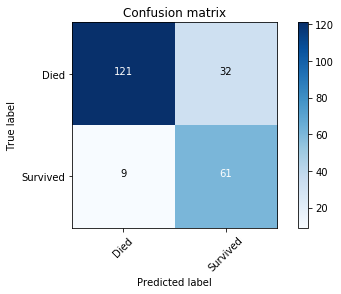

Test Accuracy: 0.816143497758 

** AdaBoost + RandomForest **
             precision    recall  f1-score   support

       Died       0.92      0.80      0.86       148
   Survived       0.69      0.85      0.76        75

avg / total       0.84      0.82      0.82       223



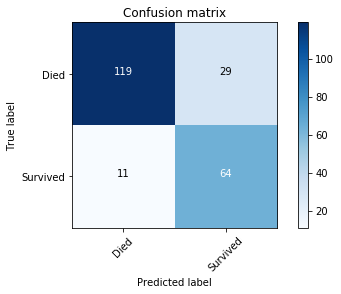

Test Accuracy: 0.820627802691 



In [23]:
print_performance_metrics('Random Forest', rf)
print_performance_metrics('AdaBoost + RandomForest', boost)

These reports give more detail on the different classes. We can see that death predicftions are more precise and have higher recall, which goes along with there being more death exmaples in the data than survival examples.

## D. Predictions

We conclude by showing how to export a Pandas DataFrame to CSV file.

In [24]:
predictions = pd.DataFrame({'PassengerId': passengerIds})
predictions['Survived'] = pd.Series(list(map(int, boost.predict(make_predictions))))
predictions.to_csv('output.csv', index=False)

The actual accuracy as scored by Kaggle was 0.78468. A reason for this difference is that our models favor death predictions to be more accurate, while survived predictions are at a closer rate to the actual result. If the Kaggle data favors surviver predictions, which is reasonable, our models will perform slightly worse. However, room for improvement thus includes improving survial predictions over death.